In [1]:
library(tseries) 
library(forecast)
library(nlWaldTest) 
library(lmtest)  
library(car) 
library(sandwich)
library(knitr) 
library(urca)
library(zoo)
library(mFilter)
library(forecast)
library(fpp2)
library(devtools)
library(broom)
library(stargazer)
library(tidyr)
library(dynlm)
library(tsDyn)
library(writexl)
library("Ecdat") 
library("gdata")
library("rugarch")
library(vars)

ERROR: ignored

In [2]:
install.packages(c("tseries", "forecast", "nlWaldTest", "lmtest", "car", "sandwich", "knitr", "urca", "zoo", "mFilter", "fpp2", "devtools", "broom", "stargazer", "tidyr", "dynlm", "tsDyn", "writexl", "Ecdat", "gdata", "rugarch", "vars"))


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘locfit’, ‘ash’, ‘hdrcde’, ‘bitops’, ‘rainbow’, ‘RCurl’, ‘DEoptimR’, ‘pcaPP’, ‘httpuv’, ‘xtable’, ‘fontawesome’, ‘sourcetools’, ‘later’, ‘promises’, ‘textshaping’, ‘fds’, ‘leaps’, ‘robustbase’, ‘inline’, ‘rrcov’, ‘misc3d’, ‘TTR’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘shiny’, ‘downlit’, ‘ragg’, ‘htmlwidgets’, ‘deSolve’, ‘iterators’, ‘fda’, ‘tis’, ‘jpeg’, ‘TeachingDemos’, ‘BMA’, ‘mvtnorm’, ‘truncnorm’, ‘FNN’, ‘kernlab’, ‘mclust’, ‘multicool’, ‘plot3D’, ‘pracma’, ‘DistributionUtils’, ‘GeneralizedHyperbolic’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘Rcpp’, ‘timeDate’, ‘RcppArmadillo’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘expsmooth’, ‘fma’, ‘miniUI’, ‘pkgdown’, ‘profvis’, ‘urlchecker’, ‘stringr’, ‘mnormt’, ‘tseriesChaos’, ‘foreach’, ‘Ecfun’, ‘gtools’, ‘Rsolnp’, ‘ks’, ‘numDeriv’, ‘spd’, ‘xts’, ‘chron’, ‘SkewHyperbolic’, ‘strucchange’


Warning

In [4]:
library(tseries)
library(forecast)
library(nlWaldTest)
library(lmtest)
library(car)
library(sandwich)
library(knitr)
library(urca)
library(zoo)
library(mFilter)
library(forecast)
library(fpp2)
library(devtools)
library(broom)
library(stargazer)
library(tidyr)
library(dynlm)
library(tsDyn)
library(writexl)
library(Ecdat)
library(gdata)
library(rugarch)
library(vars)


In [5]:
############################################################################

# - 17 -
# VAR & SVAR

rm(list=ls()) 
x <- ts(read.csv("lszusa.csv", header = TRUE), start=c(1974,1), frequency=12)

###
# Точного совпадения с книгой В.П. Носко не будет, так как данные за 1974-80
# а в книге и оригинальной статье оценки даны за 1960-96!!! 
####
# - 17 a - 

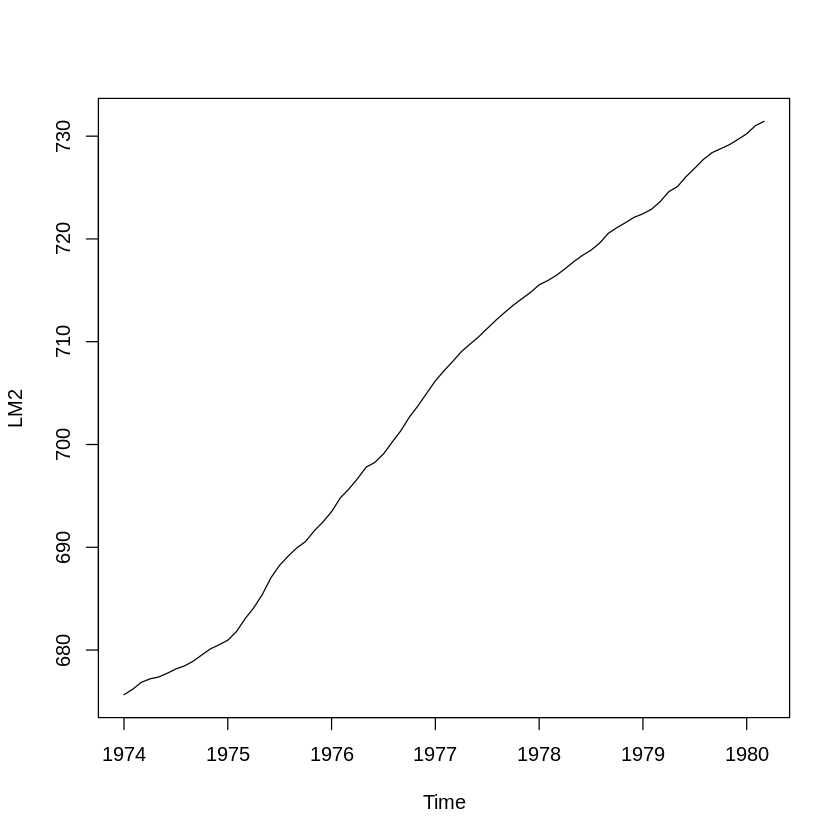

In [8]:
#LM2
#dev.off()
#dev.new(width = 10, height = 6, unit = "cm", noRStudioGD = TRUE)
ts.plot(x[,"lm2"], type="l", col=c(1), ylab = "LM2")


In [9]:


# - 17 b -
# I(1)?
# ur.df проводит тестирование Dickey-Fuller
summary(ur.df(x[,"lm2"],  type = "trend", selectlags = "AIC"))
summary(ur.df(x[,"lm2"],  type = "drift", selectlags = "AIC"))

#Другие команды тестирующие err на стационарность:
# adf.test также проводит тестирование Dickey-Fuller, но с опциями тренда и константы.
# Для месячных данных можно экономиести обосновать включение 12 лагов,
# что с практичекой точки зрения скорее всего избыточно (на что указывают информационные криетрии) 
adf.test(x[,"lm2"], k = 12)
adf.test(x[,"lm2"], k = 1)

# Phillips-Perron Unit Root Test
pp.test(x[,"lm2"])
#Не отвергаем H0

#Первые разности diff()

summary(ur.df(diff(x[,"lm2"]),  type = "drift", selectlags = "AIC"))
adf.test(diff(x[,"lm2"]), k = 12)
# Phillips-Perron Unit Root Test
pp.test(diff(x[,"lm2"]))
#отвергаем H0
# есть свидетельства в пользу LM2 ~ I(1)



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5400 -0.1157 -0.0029  0.1480  0.4463 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.65568   10.19713   0.947    0.347    
z.lag.1     -0.01393    0.01517  -0.919    0.361    
tt           0.01030    0.01255   0.821    0.414    
z.diff.lag   0.69398    0.08886   7.810 4.45e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2209 on 69 degrees of freedom
Multiple R-squared:  0.4842,	Adjusted R-squared:  0.4617 
F-statistic: 21.59 on 3 and 69 DF,  p-value: 5.714e-10


Value of test-statistic is: -0.9189 4.241 0.8722 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3 -4.04 -3.45 -3.15
phi2  6.50  4.88  


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.54527 -0.11028 -0.02074  0.14162  0.47339 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.329629   1.058466   1.256    0.213    
z.lag.1     -0.001545   0.001490  -1.037    0.303    
z.diff.lag   0.680206   0.087055   7.813 4.03e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2204 on 70 degrees of freedom
Multiple R-squared:  0.4791,	Adjusted R-squared:  0.4642 
F-statistic: 32.19 on 2 and 70 DF,  p-value: 1.219e-10


Value of test-statistic is: -1.0371 6.0527 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.51 -2.89 -2.58
phi1  6.70  4.71  3.86



	Augmented Dickey-Fuller Test

data:  x[, "lm2"]
Dickey-Fuller = -0.79373, Lag order = 12, p-value = 0.9579
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  x[, "lm2"]
Dickey-Fuller = -0.91886, Lag order = 1, p-value = 0.9446
alternative hypothesis: stationary



	Phillips-Perron Unit Root Test

data:  x[, "lm2"]
Dickey-Fuller Z(alpha) = -1.5097, Truncation lag parameter = 3, p-value
= 0.9778
alternative hypothesis: stationary



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.53913 -0.14264 -0.03215  0.12801  0.50525 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.20617    0.07685   2.683  0.00913 **
z.lag.1     -0.27481    0.09510  -2.890  0.00515 **
z.diff.lag  -0.10799    0.12124  -0.891  0.37616   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2222 on 69 degrees of freedom
Multiple R-squared:  0.1595,	Adjusted R-squared:  0.1351 
F-statistic: 6.546 on 2 and 69 DF,  p-value: 0.002494


Value of test-statistic is: -2.8898 4.1806 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.51 -2.89 -2.58
phi1  6.70  4.71  3.86


Warning message in adf.test(diff(x[, "lm2"]), k = 12):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  diff(x[, "lm2"])
Dickey-Fuller = -4.2358, Lag order = 12, p-value = 0.01
alternative hypothesis: stationary



	Phillips-Perron Unit Root Test

data:  diff(x[, "lm2"])
Dickey-Fuller Z(alpha) = -22.433, Truncation lag parameter = 3, p-value
= 0.02974
alternative hypothesis: stationary



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.45666 -0.16065 -0.01342  0.12108  0.64046 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.130578   6.232373  -0.984    0.329    
z.lag.1      0.016352   0.016227   1.008    0.317    
tt          -0.007501   0.010033  -0.748    0.457    
z.diff.lag   0.619711   0.099156   6.250 2.95e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.215 on 69 degrees of freedom
Multiple R-squared:  0.5245,	Adjusted R-squared:  0.5038 
F-statistic: 25.37 on 3 and 69 DF,  p-value: 3.568e-11


Value of test-statistic is: 1.0077 4.9946 2.5552 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3 -4.04 -3.45 -3.15
phi2


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.44549 -0.14537 -0.01826  0.13150  0.64158 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.510061   0.805187  -1.875   0.0649 .  
z.lag.1      0.004314   0.002016   2.140   0.0358 *  
z.diff.lag   0.649589   0.090461   7.181 5.84e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2143 on 70 degrees of freedom
Multiple R-squared:  0.5207,	Adjusted R-squared:  0.507 
F-statistic: 38.02 on 2 and 70 DF,  p-value: 6.642e-12


Value of test-statistic is: 2.1402 7.2582 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.51 -2.89 -2.58
phi1  6.70  4.71  3.86


Warning message in adf.test(x[, "lp"], k = 12):
“p-value greater than printed p-value”



	Augmented Dickey-Fuller Test

data:  x[, "lp"]
Dickey-Fuller = 0.94842, Lag order = 12, p-value = 0.99
alternative hypothesis: stationary



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.47538 -0.14179 -0.00693  0.14715  0.51932 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.14995    0.07190   2.085   0.0407 *
z.lag.1     -0.20296    0.09463  -2.145   0.0355 *
z.diff.lag  -0.25764    0.11953  -2.155   0.0346 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2155 on 69 degrees of freedom
Multiple R-squared:  0.1865,	Adjusted R-squared:  0.1629 
F-statistic: 7.907 on 2 and 69 DF,  p-value: 0.0008094


Value of test-statistic is: -2.1449 2.3251 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.51 -2.89 -2.58
phi1  6.70  4.71  3.86



	Augmented Dickey-Fuller Test

data:  diff(x[, "lp"])
Dickey-Fuller = -2.1102, Lag order = 12, p-value = 0.5305
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  diff(x[, "lp"])
Dickey-Fuller = -2.7743, Lag order = 1, p-value = 0.2598
alternative hypothesis: stationary


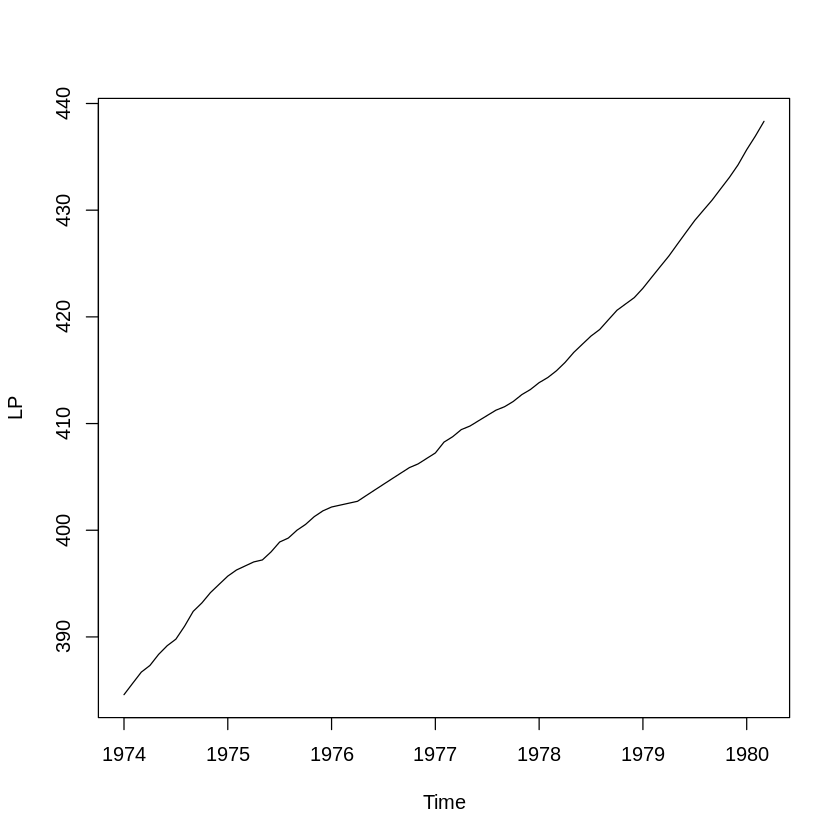

In [10]:

# - 17 c -
#LP
#dev.off()
#dev.new(width = 10, height = 6, unit = "cm", noRStudioGD = TRUE)
ts.plot(x[,"lp"], type="l", col=c(1), ylab = "LP")

summary(ur.df(x[,"lp"],  type = "trend", selectlags = "AIC"))
summary(ur.df(x[,"lp"],  type = "drift", selectlags = "AIC"))
adf.test(x[,"lp"], k = 12)
#Не отвергаем H0

summary(ur.df(diff(x[,"lp"]),  type = "drift", selectlags = "AIC"))
adf.test(diff(x[,"lp"]), k = 12)
# в предыдущей команде критерий Акаике выбрал 1 лаг
adf.test(diff(x[,"lp"]), k = 1)
# Вывод:  результат для dlp не отвергает Н0 даже для приращений


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.09309 -0.31439 -0.05523  0.33232  1.02416 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 64.89680   26.83958   2.418 0.018253 *  
z.lag.1     -0.07880    0.03265  -2.414 0.018450 *  
tt           0.02649    0.01097   2.415 0.018405 *  
z.diff.lag   0.41663    0.10612   3.926 0.000202 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4581 on 69 degrees of freedom
Multiple R-squared:  0.2423,	Adjusted R-squared:  0.2094 
F-statistic: 7.356 on 3 and 69 DF,  p-value: 0.0002391


Value of test-statistic is: -2.4137 3.8687 2.9554 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3 -4.04 -3.45 -3.15
phi2  6


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.22287 -0.29438 -0.02733  0.29557  1.07384 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.951486   6.606197   0.295 0.768561    
z.lag.1     -0.002169   0.007920  -0.274 0.784954    
z.diff.lag   0.426016   0.109644   3.885 0.000229 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4736 on 70 degrees of freedom
Multiple R-squared:  0.1783,	Adjusted R-squared:  0.1548 
F-statistic: 7.594 on 2 and 70 DF,  p-value: 0.001036


Value of test-statistic is: -0.2739 2.7013 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.51 -2.89 -2.58
phi1  6.70  4.71  3.86



	Augmented Dickey-Fuller Test

data:  x[, "ly"]
Dickey-Fuller = -1.4976, Lag order = 12, p-value = 0.7804
alternative hypothesis: stationary



	Augmented Dickey-Fuller Test

data:  x[, "ly"]
Dickey-Fuller = -2.4137, Lag order = 1, p-value = 0.4067
alternative hypothesis: stationary



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.19725 -0.28977 -0.02189  0.30604  1.08055 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.13361    0.06508   2.053   0.0439 *  
z.lag.1     -0.56219    0.13048  -4.309 5.34e-05 ***
z.diff.lag  -0.01035    0.12018  -0.086   0.9316    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4757 on 69 degrees of freedom
Multiple R-squared:  0.2789,	Adjusted R-squared:  0.258 
F-statistic: 13.34 on 2 and 69 DF,  p-value: 1.263e-05


Value of test-statistic is: -4.3087 9.2945 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.51 -2.89 -2.58
phi1  6.70  4.71  3.86



	Augmented Dickey-Fuller Test

data:  diff(x[, "ly"])
Dickey-Fuller = -2.7578, Lag order = 12, p-value = 0.2665
alternative hypothesis: stationary


Warning message in adf.test(diff(x[, "ly"]), k = 1):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  diff(x[, "ly"])
Dickey-Fuller = -4.2844, Lag order = 1, p-value = 0.01
alternative hypothesis: stationary


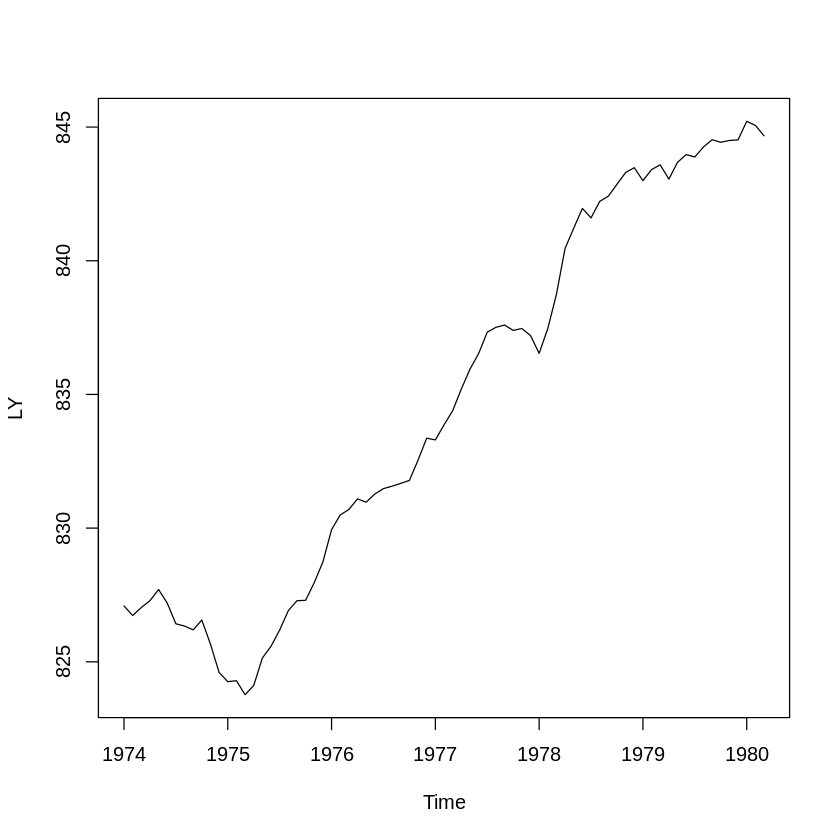

In [11]:


#LY
#dev.off()
#dev.new(width = 10, height = 6, unit = "cm", noRStudioGD = TRUE)
ts.plot(x[,"ly"], type="l", col=c(1), ylab = "LY")
summary(ur.df(x[,"ly"],  type = "trend", selectlags = "AIC"))
summary(ur.df(x[,"ly"],  type = "drift", selectlags = "AIC"))
# включим избыточное число лагов (из-за сезонности)
adf.test(x[,"ly"], k = 12)
adf.test(x[,"ly"], k = 1)
#Не отвергаем H0 LY ~ I(1)

summary(ur.df(diff(x[,"ly"]),  type = "drift", selectlags = "AIC"))
adf.test(diff(x[,"ly"]), k = 12)
# для меньшего числа лагов (AIC выбирает 1 лаг) Н0 отвеграется
adf.test(diff(x[,"ly"]), k = 1)
#отвергаем H0 diff(LY) ~ I(1)

# есть свидетельства в пользу LY ~ I(1)

In [12]:
# - 17 d -

#Выбор числа лагов
p <- x[,"lp"]
y <- x[,"ly"]
m2 <- x[,"lm2"]
varmat_f <- as.matrix(cbind(p,y,m2))

#VARselect(y, lag.max = 10, type = c("const", "trend", "both", "none"), season = NULL, exogen = NULL)

VARselect(varmat_f, lag.max = 10, type = "trend")
# p=2 
# в схеме Тода- Ямамото предлагется использовать большее число лагов

# VAR(3)
#VAR(y, p = number of lags, type = c("const", "trend", "both", "none"),
#season = NULL, exogen = NULL, lag.max = NULL,
#ic = c("AIC", "HQ", "SC", "FPE"))

VARp3 <-VAR(varmat_f, p = 3, type =  "const")

summary(VARp3)

,1,2,3,4,5,6,7,8,9,10
AIC(n),-7.5166311665,-7.9719376159,-7.9290388878,-7.8088823785,-7.6713064686,-7.5195982458,-7.4673063574,-7.4586186209,-7.548746554,-7.4437392447
HQ(n),-7.3582431348,-7.6947585605,-7.5330688086,-7.2941212755,-7.0377543418,-6.7672550952,-6.5961721831,-6.4686934228,-6.440030332,-6.2162319991
SC(n),-7.1152058243,-7.2694432672,-6.9254755325,-6.5042500165,-6.0656051001,-5.6128278706,-5.2594669757,-4.9497102325,-4.738769159,-4.3326928431
FPE(n),0.0005442162,0.0003458788,0.0003628028,0.0004128249,0.0004806636,0.0005716874,0.0006211415,0.0006532698,0.000630929,0.0007530984



VAR Estimation Results:
Endogenous variables: p, y, m2 
Deterministic variables: const 
Sample size: 72 
Log Likelihood: 2.706 
Roots of the characteristic polynomial:
1.014 0.9499 0.9499 0.5516 0.4665 0.4665 0.3897 0.3897 0.1226
Call:
VAR(y = varmat_f, p = 3, type = "const")


Estimation results for equation p: 
p = p.l1 + y.l1 + m2.l1 + p.l2 + y.l2 + m2.l2 + p.l3 + y.l3 + m2.l3 + const 

       Estimate Std. Error t value Pr(>|t|)    
p.l1    1.34995    0.12593  10.720 9.49e-16 ***
y.l1    0.01178    0.05927   0.199    0.843    
m2.l1  -0.03969    0.13372  -0.297    0.768    
p.l2   -0.25649    0.21100  -1.216    0.229    
y.l2    0.01269    0.09186   0.138    0.891    
m2.l2  -0.07451    0.21708  -0.343    0.733    
p.l3   -0.07061    0.13284  -0.532    0.597    
y.l3    0.01232    0.06004   0.205    0.838    
m2.l3   0.08699    0.12371   0.703    0.485    
const -20.37194   14.10497  -1.444    0.154    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Residual 

In [13]:


# - 17 e -
# Задание первого  упорядочиния P-> Y-> M2 
# Нужно в явном виде задать матрицы А и B: 
# Ay(t) = Cy(t-1) + Be(t)
#
# A =  1  0 0
#     NA  1 0
#     NA  NA 1
# Создаем матрицу А

a.1 <- diag(3)
diag(a.1) <- 1
a.1[2, 1] <- NA
a.1[3, 1] <- NA
a.1[3, 2] <- NA
print(a.1)

# Создаем матрицу B для первого упорядочения 
# B = NA  0  0
#     0  NA  0
#     0   0  NA

b.1 <- diag(3)
diag(b.1) <- NA
print(b.1)

#Перед оценкой SAVR необходимо построить обычную VAR
VARselect(varmat_f, lag.max = 10, type = "const")
# выбрано 2 или 3 лага
# но на странице 442 указано, что графики строились для модели с 6 лагами
# это в целом не провтиворечит нашму результату, так как там временной ряд в 6 раз длиннее
# p= 4
var_f <- VAR(varmat_f, p = 4, type = "const")
summary(var_f)

#SVAR(x, estmethod = c("scoring", "direct"), Amat = NULL, Bmat = NULL,
#     start = NULL, max.iter = 100, conv.crit = 1e-07, maxls = 1,
#     lrtest = TRUE, ...)

svar_f <- SVAR(var_f, estmethod = "direct", Amat = a.1, Bmat = b.1, max.iter = 100)
summary(svar_f)

     [,1] [,2] [,3]
[1,]    1    0    0
[2,]   NA    1    0
[3,]   NA   NA    1
     [,1] [,2] [,3]
[1,]   NA    0    0
[2,]    0   NA    0
[3,]    0    0   NA


,1,2,3,4,5,6,7,8,9,10
AIC(n),-7.585012109,-8.1009934505,-8.0318011219,-7.8987923896,-7.7797099511,-7.6439789814,-7.5856632037,-7.5462066790,-7.5867383924,-7.4931608299
HQ(n),-7.426624077,-7.8238143950,-7.6358310427,-7.3840312866,-7.1461578243,-6.8916358309,-6.7145290294,-6.5562814809,-6.4780221705,-6.2656535843
SC(n),-7.183586767,-7.3984991017,-7.0282377666,-6.5941600277,-6.1740085826,-5.7372086063,-5.3778238219,-5.0372982907,-4.7767609974,-4.3821144284
FPE(n),0.000508246,0.0003040015,0.0003273721,0.0003773275,0.0004312828,0.0005048249,0.0005518091,0.0005984855,0.0006074085,0.0007167838



VAR Estimation Results:
Endogenous variables: p, y, m2 
Deterministic variables: const 
Sample size: 71 
Log Likelihood: 8.497 
Roots of the characteristic polynomial:
1.011 0.9621 0.9621 0.692 0.692 0.6785 0.6785 0.6009 0.6009 0.4847 0.4324 0.4324
Call:
VAR(y = varmat_f, p = 4, type = "const")


Estimation results for equation p: 
p = p.l1 + y.l1 + m2.l1 + p.l2 + y.l2 + m2.l2 + p.l3 + y.l3 + m2.l3 + p.l4 + y.l4 + m2.l4 + const 

        Estimate Std. Error t value Pr(>|t|)    
p.l1    1.363541   0.129433  10.535 4.35e-15 ***
y.l1    0.023471   0.061568   0.381   0.7044    
m2.l1  -0.029404   0.144462  -0.204   0.8394    
p.l2   -0.268800   0.216332  -1.243   0.2190    
y.l2    0.020073   0.099747   0.201   0.8412    
m2.l2  -0.039456   0.255735  -0.154   0.8779    
p.l3   -0.078128   0.220050  -0.355   0.7238    
y.l3   -0.057426   0.106368  -0.540   0.5913    
m2.l3   0.075245   0.237198   0.317   0.7522    
p.l4    0.002071   0.136666   0.015   0.9880    
y.l4    0.066458   0.06381

Warning message in SVAR(var_f, estmethod = "direct", Amat = a.1, Bmat = b.1, max.iter = 100):
“The AB-model is just identified. No test possible.”



SVAR Estimation Results:

Call:
SVAR(x = var_f, estmethod = "direct", Amat = a.1, Bmat = b.1, 
    max.iter = 100)

Type: AB-model 
Sample size: 71 
Log Likelihood: -10.875 
Method: direct 
Number of iterations: 501 
Convergence code: 1 

Estimated A matrix:
          p       y m2
p  1.000000 0.00000  0
y  0.006063 1.00000  0
m2 0.013916 0.05129  1

Estimated B matrix:
        p      y     m2
p  0.2049 0.0000 0.0000
y  0.0000 0.4302 0.0000
m2 0.0000 0.0000 0.1873

Covariance matrix of reduced form residuals (*100):
          p        y       m2
p   4.19923 -0.02546 -0.05713
y  -0.02546 18.50460 -0.94873
m2 -0.05713 -0.94873  3.55836

Warning message in SVAR(x = varboot, estmethod = "direct", Amat = a.1, Bmat = b.1, :
“The AB-model is just identified. No test possible.”
Warning message in SVAR(x = varboot, estmethod = "direct", Amat = a.1, Bmat = b.1, :
“The AB-model is just identified. No test possible.”
Warning message in SVAR(x = varboot, estmethod = "direct", Amat = a.1, Bmat = b.1, :
“The AB-model is just identified. No test possible.”
Warning message in SVAR(x = varboot, estmethod = "direct", Amat = a.1, Bmat = b.1, :
“The AB-model is just identified. No test possible.”
Warning message in SVAR(x = varboot, estmethod = "direct", Amat = a.1, Bmat = b.1, :
“The AB-model is just identified. No test possible.”
Warning message in SVAR(x = varboot, estmethod = "direct", Amat = a.1, Bmat = b.1, :
“The AB-model is just identified. No test possible.”
Warning message in SVAR(x = varboot, estmethod = "direct", Amat = a.1, Bmat = b.1, :
“The AB-model is just identified. No test possible.”
Warning message in SVAR(x = varboo

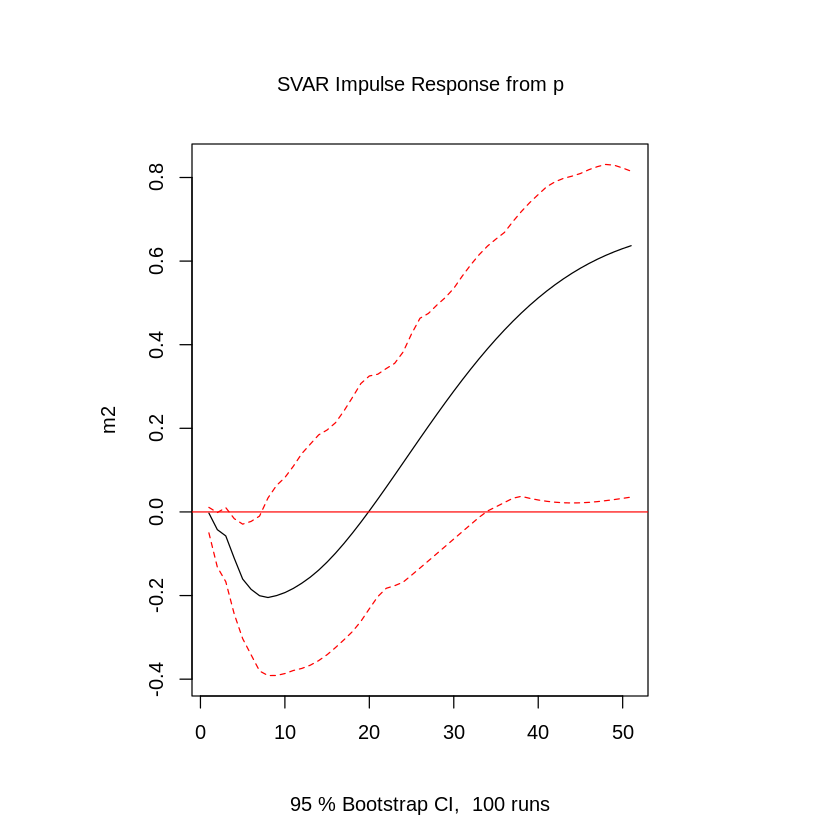

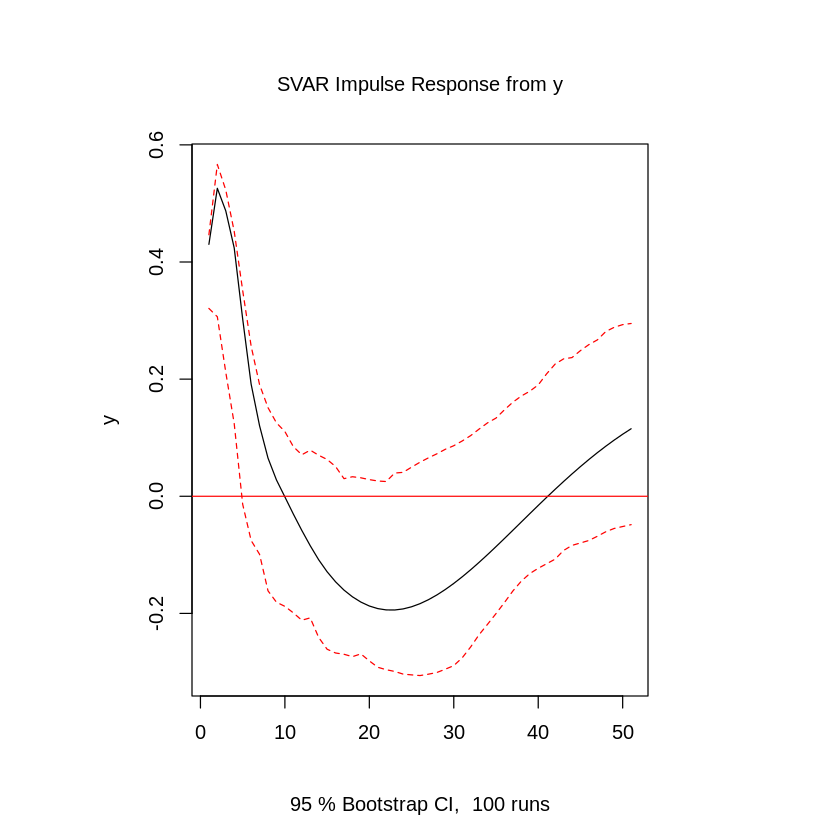

In [14]:
# - 17 f -

#IRF

irf_PonM_f <- irf(svar_f, response = "m2", impulse = "p", 
                  n.ahead = 50,  ortho = TRUE, boot = TRUE)
#Сравним рис 6.17 стр 443, помня про различия в периодах исходных данных и числе лагов
#dev.off()
#dev.new(width = 10, height = 6, unit = "cm", noRStudioGD = TRUE)
plot(irf_PonM_f)

irf_YonY_f <- irf(svar_f, response = "y", impulse = "y", 
                  n.ahead = 50,  ortho = TRUE, boot = TRUE)
#Сравним рис 6.17 стр 443, помня про различия в периодах исходных данных и числе лагов
#dev.off()
#dev.new(width = 10, height = 6, unit = "cm", noRStudioGD = TRUE)
plot(irf_YonY_f)


   Length Class  Mode   
p  60     -none- numeric
y  60     -none- numeric
m2 60     -none- numeric

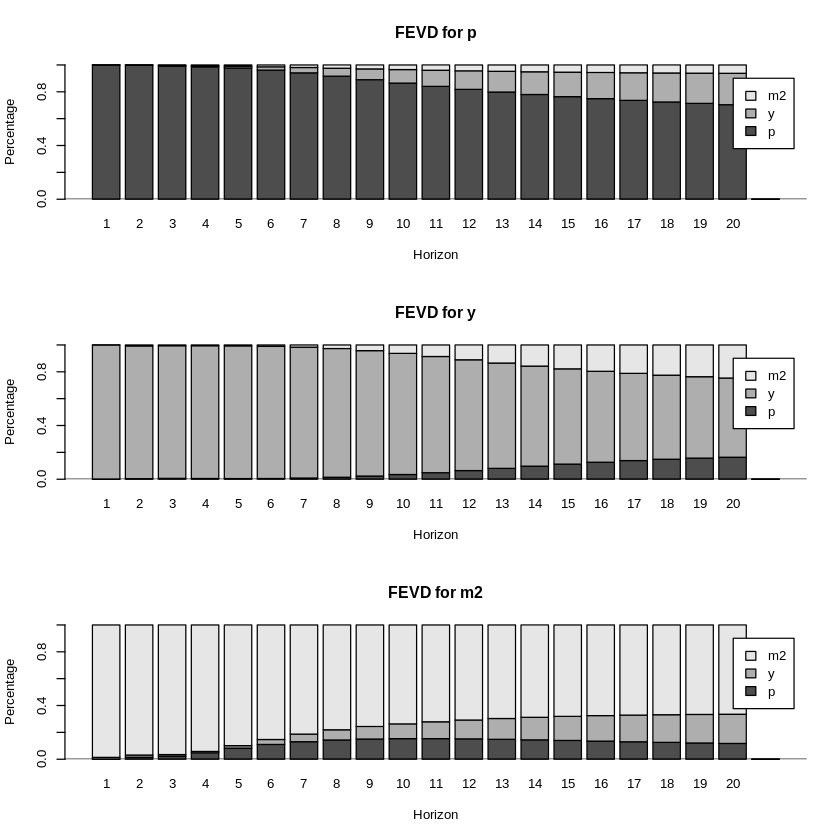

In [15]:



# - 17 g -
#Разложение ошибки 
vth_f <- fevd(svar_f, n.ahead=20)
summary(vth_f)

#Сравним рис 6.18 стр 444, помня про различия в периодах исходных данных и числе лагов
#dev.off()
#dev.new(width = 10, height = 6, unit = "cm", noRStudioGD = TRUE)
plot(vth_f)



VAR Estimation Results:
Endogenous variables: m2, y, p 
Deterministic variables: const 
Sample size: 69 
Log Likelihood: 16.827 
Roots of the characteristic polynomial:
1.017 0.9475 0.9475 0.8643 0.8643 0.7424 0.7424 0.7143 0.7143 0.7129 0.7129 0.6978 0.6978 0.6626 0.6626 0.5992 0.5897 0.5897
Call:
VAR(y = varmat_s, p = 6, type = "const")


Estimation results for equation m2: 
m2 = m2.l1 + y.l1 + p.l1 + m2.l2 + y.l2 + p.l2 + m2.l3 + y.l3 + p.l3 + m2.l4 + y.l4 + p.l4 + m2.l5 + y.l5 + p.l5 + m2.l6 + y.l6 + p.l6 + const 

      Estimate Std. Error t value Pr(>|t|)    
m2.l1  1.55639    0.14427  10.788 1.18e-14 ***
y.l1   0.16993    0.06072   2.798  0.00727 ** 
p.l1  -0.21937    0.12402  -1.769  0.08301 .  
m2.l2 -0.60335    0.25917  -2.328  0.02400 *  
y.l2  -0.27300    0.09551  -2.858  0.00619 ** 
p.l2   0.30687    0.21067   1.457  0.15148    
m2.l3  0.14632    0.26457   0.553  0.58269    
y.l3   0.01697    0.10452   0.162  0.87167    
p.l3  -0.27575    0.21101  -1.307  0.19726    
m2.l

Warning message in SVAR(var_s, estmethod = "direct", Amat = a.1, Bmat = b.1, max.iter = 100):
“The AB-model is just identified. No test possible.”



SVAR Estimation Results:

Call:
SVAR(x = var_s, estmethod = "direct", Amat = a.1, Bmat = b.1, 
    max.iter = 100)

Type: AB-model 
Sample size: 69 
Log Likelihood: -17.321 
Method: direct 
Number of iterations: 501 
Convergence code: 1 

Estimated A matrix:
         m2        y p
m2  1.00000  0.00000 0
y  -0.16147  1.00000 0
p  -0.00154 -0.05936 1

Estimated B matrix:
       m2      y      p
m2 0.1921 0.0000 0.0000
y  0.0000 0.4317 0.0000
p  0.0000 0.0000 0.2195

Covariance matrix of reduced form residuals (*100):
        m2       y       p
m2 3.69162  0.5961 0.04107
y  0.59610 18.7361 1.11302
p  0.04107  1.1130 4.88516

Warning message in SVAR(x = varboot, estmethod = "direct", Amat = a.1, Bmat = b.1, :
“The AB-model is just identified. No test possible.”
Warning message in SVAR(x = varboot, estmethod = "direct", Amat = a.1, Bmat = b.1, :
“The AB-model is just identified. No test possible.”
Warning message in SVAR(x = varboot, estmethod = "direct", Amat = a.1, Bmat = b.1, :
“The AB-model is just identified. No test possible.”
Warning message in SVAR(x = varboot, estmethod = "direct", Amat = a.1, Bmat = b.1, :
“The AB-model is just identified. No test possible.”
Warning message in SVAR(x = varboot, estmethod = "direct", Amat = a.1, Bmat = b.1, :
“The AB-model is just identified. No test possible.”
Warning message in SVAR(x = varboot, estmethod = "direct", Amat = a.1, Bmat = b.1, :
“The AB-model is just identified. No test possible.”
Warning message in SVAR(x = varboot, estmethod = "direct", Amat = a.1, Bmat = b.1, :
“The AB-model is just identified. No test possible.”
Warning message in SVAR(x = varboo

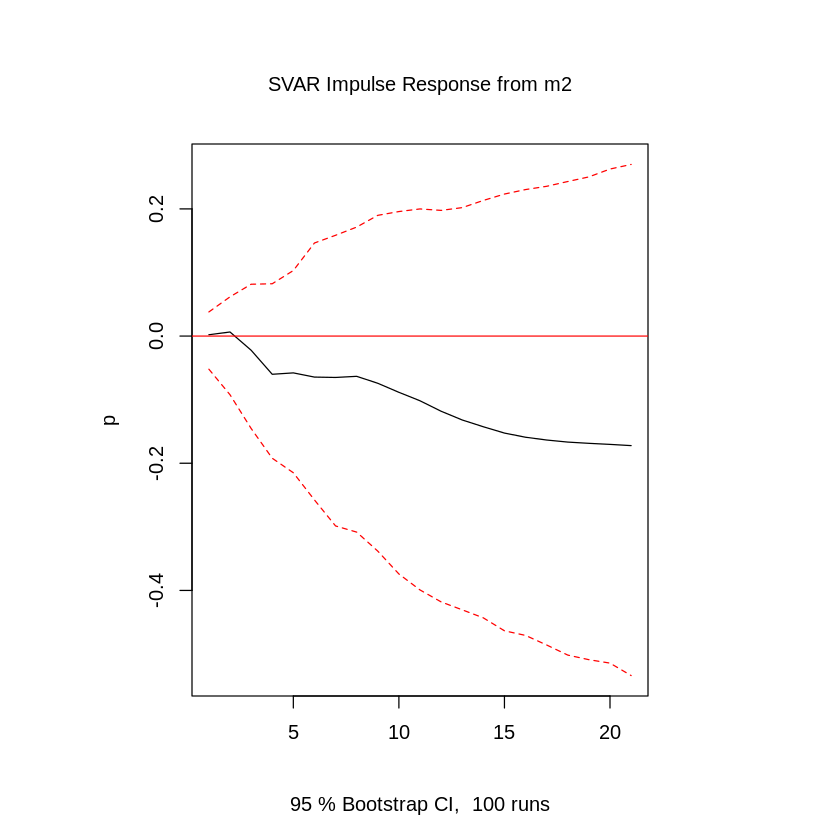

   Length Class  Mode   
m2 60     -none- numeric
y  60     -none- numeric
p  60     -none- numeric

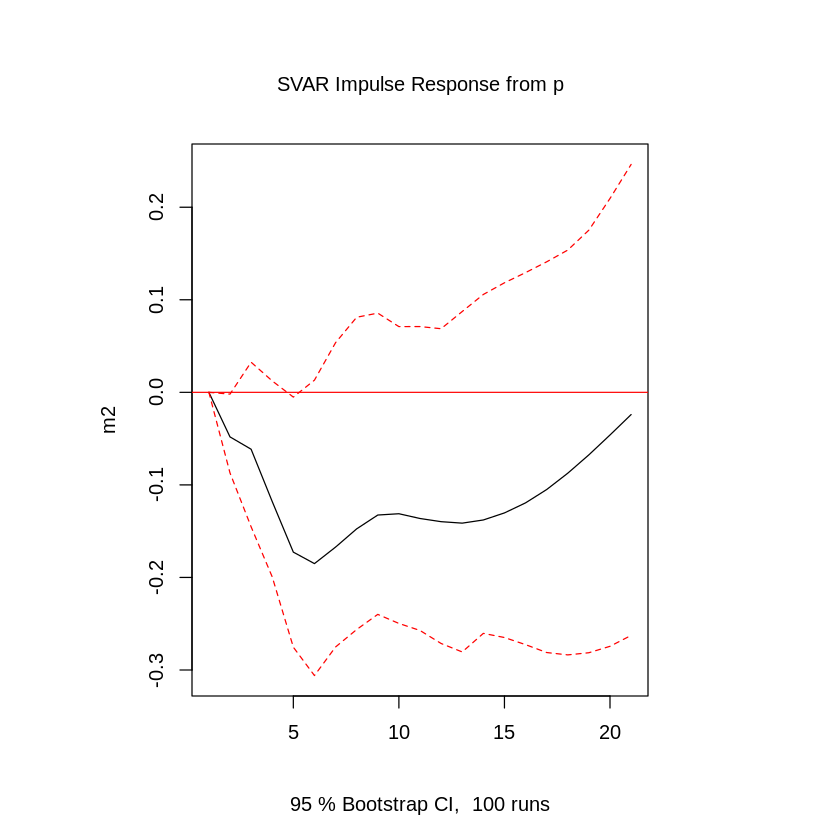

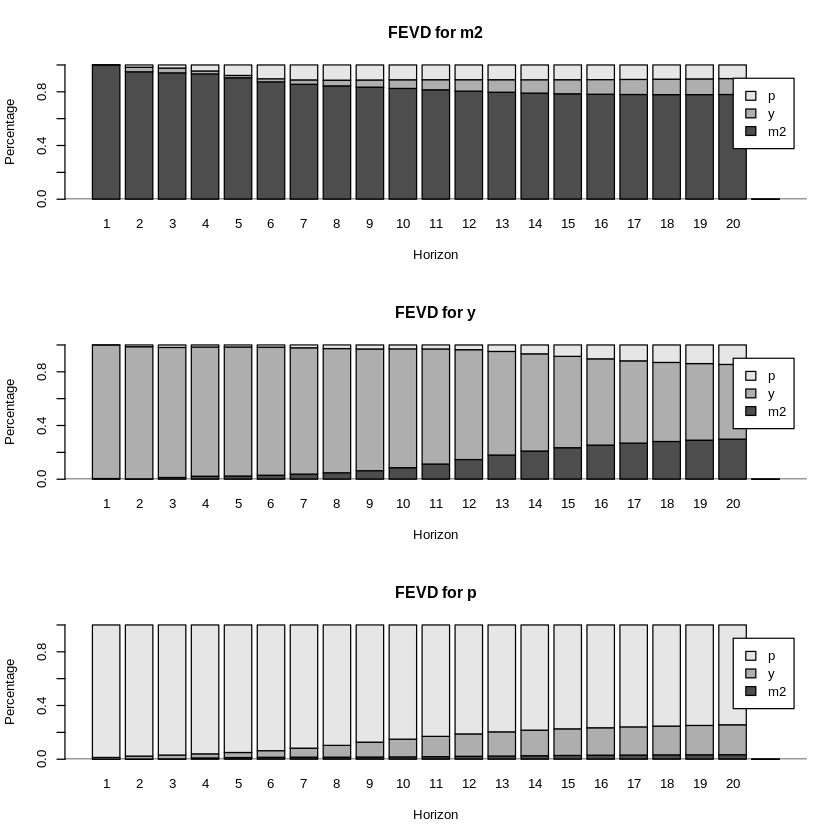

In [16]:

# - 17 h -
# второе упорядочение
# меняем порядок включения переменных M2 - Y - P
varmat_s <- as.matrix(cbind(m2,y,p))
var_s <- VAR(varmat_s, p = 6, type = "const")
summary(var_s)

svar_s <- SVAR(var_s, estmethod = "direct", Amat = a.1, Bmat = b.1, max.iter = 100)
summary(svar_s)

# альтернатива - использовать ту меж матрицу varmat, но другие А и B
# т.е. можно переставить столюцы в данных, либо менять упорядочение через структуру A и B

irf_MonP_s <- irf(svar_s, response = "p", impulse = "m2", 
                  n.ahead = 20, ortho = TRUE, boot = TRUE)
#dev.off()
#dev.new(width = 10, height = 6, unit = "cm", noRStudioGD = TRUE)
plot(irf_MonP_s)

irf_PonM_s <- irf(svar_s, response = "m2", impulse = "p", 
                  n.ahead = 20, ortho = TRUE, boot = TRUE)
#dev.off()
#dev.new(width = 10, height = 6, unit = "cm", noRStudioGD = TRUE)
plot(irf_PonM_s)

#Разложение ошибки 
vth_s <- fevd(svar_s, n.ahead=20)
summary(vth_s)
#dev.off()
#dev.new(width = 10, height = 6, unit = "cm", noRStudioGD = TRUE)
plot(vth_s)

,1,2,3,4,5,6,7,8,9,10
AIC(n),0.8196248,0.5212156,0.4067730,0.3121583,0.3481924,0.2085509,0.1975105,0.2347744,0.1881709,0.2276106
HQ(n),0.8348909,0.5517479,0.4525714,0.3732229,0.4245231,0.3001477,0.3043734,0.3569035,0.3255661,0.3802720
SC(n),0.8618468,0.6056596,0.5334390,0.4810463,0.5593024,0.4618828,0.4930644,0.5725503,0.5681688,0.6498304
FPE(n),2.2696717,1.6842142,1.5023870,1.3672878,1.4183679,1.2347046,1.2228088,1.2715537,1.2165318,1.2692627



VAR Estimation Results:
Endogenous variables: x1, x2 
Deterministic variables: const 
Sample size: 40 
Log Likelihood: -80.377 
Roots of the characteristic polynomial:
1.011 0.9637 0.9637 0.9065 0.9065 0.9058 0.9058 0.889 0.889 0.8744 0.8744 0.868 0.868 0.8433 0.8433 0.8032 0.8032 0.8019 0.8019 0.3402
Call:
VAR(y = varmat, p = 10, type = "const")


Estimation results for equation x1: 
x1 = x1.l1 + x2.l1 + x1.l2 + x2.l2 + x1.l3 + x2.l3 + x1.l4 + x2.l4 + x1.l5 + x2.l5 + x1.l6 + x2.l6 + x1.l7 + x2.l7 + x1.l8 + x2.l8 + x1.l9 + x2.l9 + x1.l10 + x2.l10 + const 

        Estimate Std. Error t value Pr(>|t|)  
x1.l1  -0.188798   0.230726  -0.818   0.4233  
x2.l1   0.085348   0.206627   0.413   0.6842  
x1.l2  -0.477367   0.252936  -1.887   0.0745 .
x2.l2  -0.339156   0.238673  -1.421   0.1715  
x1.l3  -0.143043   0.280815  -0.509   0.6163  
x2.l3   0.154467   0.255248   0.605   0.5522  
x1.l4  -0.201551   0.245884  -0.820   0.4226  
x2.l4  -0.165665   0.284701  -0.582   0.5675  
x1.l5  -0.321

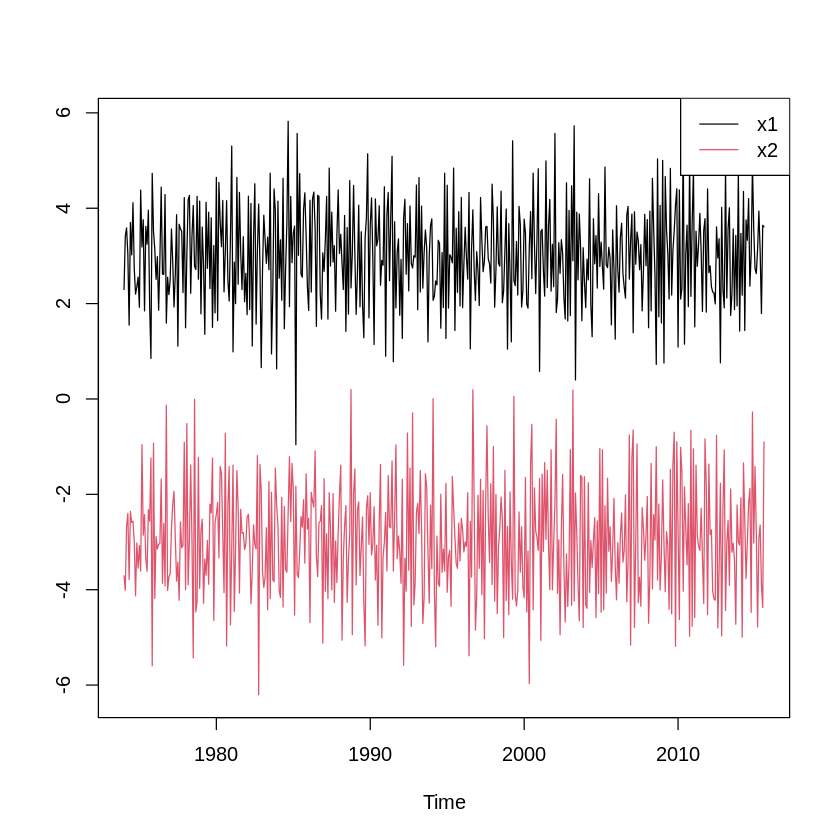

In [19]:




#############################################################
# - 18 -
# VMA

#rm(list=ls()) 
x <- ts(read.csv("VMA.csv", header = TRUE), start=c(1974,1), frequency=12)
x1 <- x[,"x1"]
x2 <- x[,"x2"]
y1 <- x[,"y1"]
y2 <- x[,"y2"]
# - 18 a -
#dev.off()
#dev.new(width = 10, height = 6, unit = "cm", noRStudioGD = TRUE)
ts.plot(x1, x2, type="l", col=c(1,2))
legend("topright", border=NULL, legend=c("x1","x2"), lty=c(1,1), col=c(1,2))


# - 18 b & c -
# в b исполняется первая строка, в c - вторая, далее код един
varmat <- as.matrix(cbind(x1 = x1[1:50], x2 = x2[1:50]))
#varmat <- as.matrix(cbind(x1 = x1[1:500], x2 = x2[1:500]))


VARselect(varmat[1:50], lag.max = 10, type = "none")
# возьмем с запасом p=5

var_5 <- VAR(varmat, p = 10, type = "const")
summary(var_5)

irf_5_11 <- irf(var_5, response = "x1", impulse = "x1", 
                n.ahead = 10, ortho = TRUE, boot = TRUE)
#dev.off()
png('VMA_5_11.png', width = 800, height = 600)
plot(irf_5_11)
#dev.off()


irf_5_12 <- irf(var_5, response = "x1", impulse = "x2", 
                n.ahead = 10, ortho = TRUE, boot = TRUE)

png('VMA_5_12.png', width = 800, height = 600)
plot(irf_5_12)
#dev.off()

irf_5_21 <- irf(var_5, response = "x2", impulse = "x1", 
                n.ahead = 10, ortho = TRUE, boot = TRUE)

png('VMA_5_21.png', width = 800, height = 600)
plot(irf_5_21)
#dev.off()

irf_5_22 <- irf(var_5, response = "x2", impulse = "x2", 
                n.ahead = 10, ortho = TRUE, boot = TRUE)

png('VMA_5_22.png', width = 800, height = 600)
plot(irf_5_22)
#dev.off()


# - 18 d - f - САМОСТОЯТЕЛЬНО




In [17]:

######################################################
# - 19 -
#Нестабильные VAR

rm(list=ls()) 

x <- read.csv("var_cointegrated.csv", header = TRUE)

eps1 <- ts(x[,"eps1"], frequency=1)
eps2 <- ts(x[,"eps2"], frequency=1)
y1 <- ts(x[,"y1"], frequency=1)
y2 <- ts(x[,"y2"], frequency=1)


# - 19 a  -
dev.off()
dev.new(width = 10, height = 6, unit = "cm", noRStudioGD = TRUE)
ts.plot(y1,y2, type="l", col=c(1,2))
legend("bottomleft", border=NULL, legend=c("y1","y2"), lty=c(1,1), col=c(1,2))

# - 19 b  -
# I(1)?
# ur.df проводит тестирование Dickey-Fuller
summary(ur.df(y1,  type = "none", selectlags = "AIC"))
adf.test(y1, k = 1)
# не отвергается Н0
# ur.df проводит тестирование Dickey-Fuller
summary(ur.df(diff(y1),  type = "none", selectlags = "AIC"))
adf.test(diff(y1), k = 1)
# отвергается Н0 для diff(y1)
# аналогичный результат для y2

# Коинтеграция?
# включение константы дискуссионно
coint12 <- dynlm(y1 ~ y2 -1)
summary(coint12)
#Сохраняем ошибку из регрессии (y1 ~ y2) и проверяем стационарна ли она.
ehat <- resid(coint12)

# Первый способ Dickey-Fuller - через ur.df() с автоматическим выбором числа лагов
summary(ur.df(ehat,  type = "none", selectlags = "AIC"))
#H0 отвергается

# ряды I(1), а ошибка регрессии стационарна
#Значит есть коинтеграция

# - 19 c  -
# Создаем матрицу DGP "на память"
DGP <- diag(2)
DGP[1, 1] <- 0.625
DGP[1, 2] <- 0.5
DGP[2, 1] <- 0.25
DGP[2, 2] <- 0.66667
print(DGP)

#UVAR
varmat <- as.matrix(cbind(y1,y2))
# выявим оптимальное число лагов
VARselect(varmat, lag.max = 10, type = "none")
# p= 1
uvar <-VAR(varmat, p = 1, type =  "none")

summary(uvar)
# Создаем матрицу UVAR "на память"
UVAR <- diag(2)
UVAR[1, 1] <- uvar[["varresult"]][["y1"]][["coefficients"]][["y1.l1"]]
UVAR[1, 2] <- uvar[["varresult"]][["y1"]][["coefficients"]][["y2.l1"]]
UVAR[2, 1] <- uvar[["varresult"]][["y2"]][["coefficients"]][["y1.l1"]]
UVAR[2, 2] <- uvar[["varresult"]][["y2"]][["coefficients"]][["y2.l1"]]
print(UVAR)


# - 19 d  -
#ECM
# лучше использовать процедуру Johansen Procedure, чем двухшаговый метод Engle-Granger
#ca.jo(x, type = c("eigen", "trace"), ecdet = c("none", "const", "trend"), K = 2,
#spec=c("longrun", "transitory"), season = NULL, dumvar = NULL)
#cointvec <- ca.jo(varmat, ecdet = "none", K = 2)
#summary(cointvec)
#VECJO <- vec2var(cointvec)
#summary(VECJO, r = 1)

##
# Можно даже сравнить два метода
# library(tsDyn)
#Johansen Procedure "ML"
VECJO <- VECM(varmat, lag=0, estim="ML")
summary(VECJO)
#Нужные коэфиициенты
minus_b <-VECJO$model.specific$coint[2]
g1 <- VECJO$coefficients[1,1]
g2 <- VECJO$coefficients[2,1]

# Создаем матрицу ECMJO "на память" - Johansen Procedure
matrcoef <- diag(2)
# y1(t) = (1+g1)*y1(t-1) +(-beta*g1)*y2(t-1)
matrcoef[1, 1] <- 1 + g1
matrcoef[1, 2] <- g1*minus_b
#y2(t) = g2*y1(t-1) +(1-beta*g2)y2(t-1)
matrcoef[2, 1] <- g2
matrcoef[2, 2] <- 1 + g2*minus_b
ECM_JO <-matrcoef
print(ECM_JO)

# - 19 e  -

#Engle and Granger 2-step approach "2OLS"
VECEG <- VECM(varmat, lag=0, estim="2OLS")
summary(VECEG)
#Нужные коэфиициенты
minus_b <-VECEG$model.specific$coint[2]
g1 <- VECEG$coefficients[1,1]
g2 <- VECEG$coefficients[2,1]


# Создаем матрицу ECMEG "на память" - Engle and Granger 2-step approach
#ПОВТОР БЛОКА
matrcoef <- diag(2)
matrcoef[1, 1] <- 1 + g1
matrcoef[1, 2] <- g1*minus_b
matrcoef[2, 1] <- g2
matrcoef[2, 2] <- 1 + g2*minus_b
#

ECM_EG <-matrcoef
print(ECM_EG)

#Engle and Granger 2-step approach можно сделать еще и так
vec1<- dynlm(d(y1)~L(ehat))
vec2 <- dynlm(d(y2)~L(ehat))
summary(vec1)
summary(vec2)
#Нужные коэфиициенты
minus_b <-  -1*coint12[["coefficients"]][["y2"]]
g1 <- vec1[["coefficients"]][["L(ehat)"]]
g2 <- vec2[["coefficients"]][["L(ehat)"]]
#ПОВТОР БЛОКА
matrcoef <- diag(2)
matrcoef[1, 1] <- 1 + g1
matrcoef[1, 2] <- g1*minus_b
matrcoef[2, 1] <- g2
matrcoef[2, 2] <- 1 + g2*minus_b
#

VEC2SL <-matrcoef
print(VEC2SL)


#СРАВНИМ
print(VEC2SL)
print(ECM_EG)
print(ECM_JO)
print(UVAR)
print(DGP)


# - 19 f  -
#IRF for UVAR

irfuvar <- irf(uvar, impulse = "y2", response = "y2",
               n.ahead = 50, ortho = TRUE, boot = TRUE)

# сравним
dev.off()
png('UVAR_22.png', width = 400, height = 300)
plot(irfuvar, ylim =c(0,1), main = "UVAR: y2 on y2")

dev.off()
#IRF for ECM
VECJO <- VECM(varmat, lag=1, estim="ML")
irfemc <- tsDyn::irf(VECJO, impulse = "y2", response = "y2" ,
                     n.ahead = 50, ortho = TRUE, boot = TRUE)
png('VECJO_22.png', width = 400, height = 300)
plot(irfemc, ylim =c(0,1), main = "VEC_JO: y2 on y2")
dev.off()

#Добавим теоретически расчитанную
y2fromy2 <- ts(x[,"y2fromy2"][1:50], frequency=1)
png('Theor_22.png', width = 400, height = 300)
plot(y2fromy2, col = "green", lty = 1, ylim =c(0,1), main = "Theoretical: y2 on y2")
dev.off()




png 
  3


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4924 -1.1644 -0.2096  0.8025  4.0220 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)   
z.lag.1    -0.06188    0.04228  -1.464  0.14654   
z.diff.lag -0.28538    0.09941  -2.871  0.00504 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.475 on 96 degrees of freedom
Multiple R-squared:  0.1195,	Adjusted R-squared:  0.1011 
F-statistic: 6.514 on 2 and 96 DF,  p-value: 0.002225


Value of test-statistic is: -1.4637 

Critical values for test statistics: 
     1pct  5pct 10pct
tau1 -2.6 -1.95 -1.61



	Augmented Dickey-Fuller Test

data:  y1
Dickey-Fuller = -2.207, Lag order = 1, p-value = 0.4909
alternative hypothesis: stationary



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3153 -0.9733 -0.0536  0.8899  4.0970 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
z.lag.1     -1.6029     0.1630  -9.832 3.77e-16 ***
z.diff.lag   0.2169     0.1008   2.152   0.0339 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.458 on 95 degrees of freedom
Multiple R-squared:  0.6723,	Adjusted R-squared:  0.6654 
F-statistic: 97.43 on 2 and 95 DF,  p-value: < 2.2e-16


Value of test-statistic is: -9.8321 

Critical values for test statistics: 
     1pct  5pct 10pct
tau1 -2.6 -1.95 -1.61


Warning message in adf.test(diff(y1), k = 1):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  diff(y1)
Dickey-Fuller = -9.7625, Lag order = 1, p-value = 0.01
alternative hypothesis: stationary



Time series regression with "ts" data:
Start = 1, End = 100

Call:
dynlm(formula = y1 ~ y2 - 1)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.0150 -1.6124 -0.4194  1.0141  4.9490 

Coefficients:
   Estimate Std. Error t value Pr(>|t|)    
y2  0.84778    0.08249   10.28   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.513 on 99 degrees of freedom
Multiple R-squared:  0.5162,	Adjusted R-squared:  0.5113 
F-statistic: 105.6 on 1 and 99 DF,  p-value: < 2.2e-16



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4644 -1.5503 -0.2353  1.2997  4.7732 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
z.lag.1     -0.5054     0.1106  -4.568 1.46e-05 ***
z.diff.lag  -0.1576     0.1023  -1.541    0.127    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.307 on 96 degrees of freedom
Multiple R-squared:  0.3169,	Adjusted R-squared:  0.3027 
F-statistic: 22.27 on 2 and 96 DF,  p-value: 1.136e-08


Value of test-statistic is: -4.5684 

Critical values for test statistics: 
     1pct  5pct 10pct
tau1 -2.6 -1.95 -1.61


      [,1]    [,2]
[1,] 0.625 0.50000
[2,] 0.250 0.66667


,1,2,3,4,5,6,7,8,9,10
AIC(n),0.08607952,0.1450327,0.1713113,0.2432549,0.1602529,0.2383242,0.2215650,0.2342783,0.2388986,0.2606532
HQ(n),0.13088264,0.2346390,0.3057206,0.4224674,0.3842685,0.5071429,0.5351869,0.5927032,0.6421267,0.7086844
SC(n),0.19718217,0.3672380,0.5046192,0.6876655,0.7157661,0.9049401,0.9992836,1.1230995,1.2388225,1.3716797
FPE(n),1.08990894,1.1562129,1.1873304,1.2765943,1.1759726,1.2731814,1.2544007,1.2736861,1.2838057,1.3174981



VAR Estimation Results:
Endogenous variables: y1, y2 
Deterministic variables: none 
Sample size: 99 
Log Likelihood: -279.811 
Roots of the characteristic polynomial:
0.9875 0.283
Call:
VAR(y = varmat, p = 1, type = "none")


Estimation results for equation y1: 
y1 = y1.l1 + y2.l1 

      Estimate Std. Error t value Pr(>|t|)    
y1.l1  0.61455    0.04464  13.766  < 2e-16 ***
y2.l1  0.48823    0.05290   9.229 6.19e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Residual standard error: 1.116 on 97 degrees of freedom
Multiple R-Squared: 0.9065,	Adjusted R-squared: 0.9046 
F-statistic: 470.3 on 2 and 97 DF,  p-value: < 2.2e-16 


Estimation results for equation y2: 
y2 = y1.l1 + y2.l1 

      Estimate Std. Error t value Pr(>|t|)    
y1.l1  0.25329    0.05637   4.493 1.94e-05 ***
y2.l1  0.65600    0.06680   9.820 3.28e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Residual standard error: 1.409 on 97 degrees of freedom
Multiple R

          [,1]      [,2]
[1,] 0.6145539 0.4882342
[2,] 0.2532947 0.6559973


Warning message in lineVar(data, lag, r = r, include = include, model = "VECM", :
“Lag=0 not fully implemented, methods not expected to work: fevd, predict, irf,...”


#############
###Model VECM 
#############
Full sample size: 100 	End sample size: 99
Number of variables: 2 	Number of estimated slope parameters 4
AIC 4.774144 	BIC 15.15462 	SSR 307.9816
Cointegrating vector (estimated by ML):
   y1        y2
r1  1 -1.358349


            ECT                Intercept          
Equation y1 -0.3776(0.0383)*** 0.1808(0.1130)     
Equation y2 0.2644(0.0484)***  -0.1785(0.1429)    

          [,1]      [,2]
[1,] 0.6223738 0.5129480
[2,] 0.2644029 0.6408486


Warning message in lineVar(data, lag, r = r, include = include, model = "VECM", :
“Lag=0 not fully implemented, methods not expected to work: fevd, predict, irf,...”


#############
###Model VECM 
#############
Full sample size: 100 	End sample size: 99
Number of variables: 2 	Number of estimated slope parameters 4
AIC 18.65467 	BIC 29.03515 	SSR 346.0087
Cointegrating vector (estimated by 2OLS):
   y1         y2
r1  1 -0.8477804


            ECT                Intercept         
Equation y1 -0.4053(0.0490)*** -0.2404(0.1232).  
Equation y2 0.2618(0.0598)***  0.1047(0.1502)    

          [,1]      [,2]
[1,] 0.5947066 0.3435998
[2,] 0.2617604 0.7780847



Time series regression with "ts" data:
Start = 2, End = 100

Call:
dynlm(formula = d(y1) ~ L(ehat))

Residuals:
     Min       1Q   Median       3Q      Max 
-3.02427 -0.62436  0.02846  0.77616  2.69486 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.24044    0.12320  -1.952   0.0539 .  
L(ehat)     -0.40529    0.04904  -8.264 7.34e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.198 on 97 degrees of freedom
Multiple R-squared:  0.4132,	Adjusted R-squared:  0.4071 
F-statistic:  68.3 on 1 and 97 DF,  p-value: 7.344e-13



Time series regression with "ts" data:
Start = 2, End = 100

Call:
dynlm(formula = d(y2) ~ L(ehat))

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7453 -0.9650 -0.1359  0.9769  4.0188 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.10467    0.15018   0.697    0.488    
L(ehat)      0.26176    0.05979   4.378 3.02e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.46 on 97 degrees of freedom
Multiple R-squared:  0.165,	Adjusted R-squared:  0.1564 
F-statistic: 19.17 on 1 and 97 DF,  p-value: 3.021e-05


          [,1]      [,2]
[1,] 0.5947066 0.3435998
[2,] 0.2617604 0.7780847
          [,1]      [,2]
[1,] 0.5947066 0.3435998
[2,] 0.2617604 0.7780847
          [,1]      [,2]
[1,] 0.5947066 0.3435998
[2,] 0.2617604 0.7780847
          [,1]      [,2]
[1,] 0.6223738 0.5129480
[2,] 0.2644029 0.6408486
          [,1]      [,2]
[1,] 0.6145539 0.4882342
[2,] 0.2532947 0.6559973
      [,1]    [,2]
[1,] 0.625 0.50000
[2,] 0.250 0.66667


png 
  3

png 
  3

png 
  3

png 
  3


###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , with linear trend in shift correction 

Eigenvalues (lambda):
[1] 0.30627948 0.20468015 0.09693166

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 2 |  8.97  5.42  6.78 10.04
r <= 1 | 27.04 13.78 15.83 19.85
r = 0  | 52.95 25.93 28.45 33.76

Eigenvectors, normalised to first column:
(These are the cointegration relations)

          y1.l1      y2.l1     y3.l1
y1.l1  1.000000  1.0000000  1.000000
y2.l1  6.651947 -0.5169393 -5.080965
y3.l1 -9.357822 -0.3685549 -4.117982

Weights W:
(This is the loading matrix)

          y1.l1       y2.l1      y3.l1
y1 -0.009146127 -0.93100364 0.02179702
y2 -0.118668182 -0.01666039 0.03008862
y3  0.044367193 -0.10679211 0.02168210


,1,2,3,4,5,6,7,8,9,10
AIC(n),-0.257847255,-0.11390675,-0.006595851,0.02045665,0.1466202,0.2524293,0.3061819,0.2973754,0.3710887,0.4737829
HQ(n),-0.157040235,0.08770729,0.295825209,0.42368473,0.6506553,0.8572714,1.0118310,1.1038315,1.2783519,1.4818531
SC(n),-0.007866288,0.38605519,0.743347050,1.02038052,1.3965250,1.7523151,2.0560487,2.2972231,2.6209174,2.9735925
FPE(n),0.772770529,0.89287153,0.995426724,1.02557005,1.1688693,1.3084256,1.3943843,1.4007481,1.5345027,1.7388508


     [,1] [,2] [,3]
[1,]    1    0    0
[2,]   NA    1    0
[3,]   NA   NA    1
     [,1] [,2] [,3]
[1,]    1    0    1
[2,]    0    1    1
[3,]    0    0    1



SVAR Estimation Results:

Call:
SVAR(x = var1, estmethod = "direct", Amat = a.mat, Bmat = b2, 
    max.iter = 100)

Type: AB-model 
Sample size: 99 
Log Likelihood: -421.425 
Method: direct 
Number of iterations: 78 
Convergence code: 0 

LR overidentification test:

	LR overidentification

data:  varmat
Chi^2 = 35, df = 3, p-value = 1e-07


Estimated A matrix:
       y1      y2 y3
y1 1.0000 0.00000  0
y2 0.1176 1.00000  0
y3 0.1119 0.03755  1

Estimated B matrix:
   y1 y2 y3
y1  1  0  1
y2  0  1  1
y3  0  0  1

Covariance matrix of reduced form residuals (*100):
       y1     y2    y3
y1 200.00  76.47 74.76
y2  76.47 179.24 72.95
y3  74.76  72.95 74.40

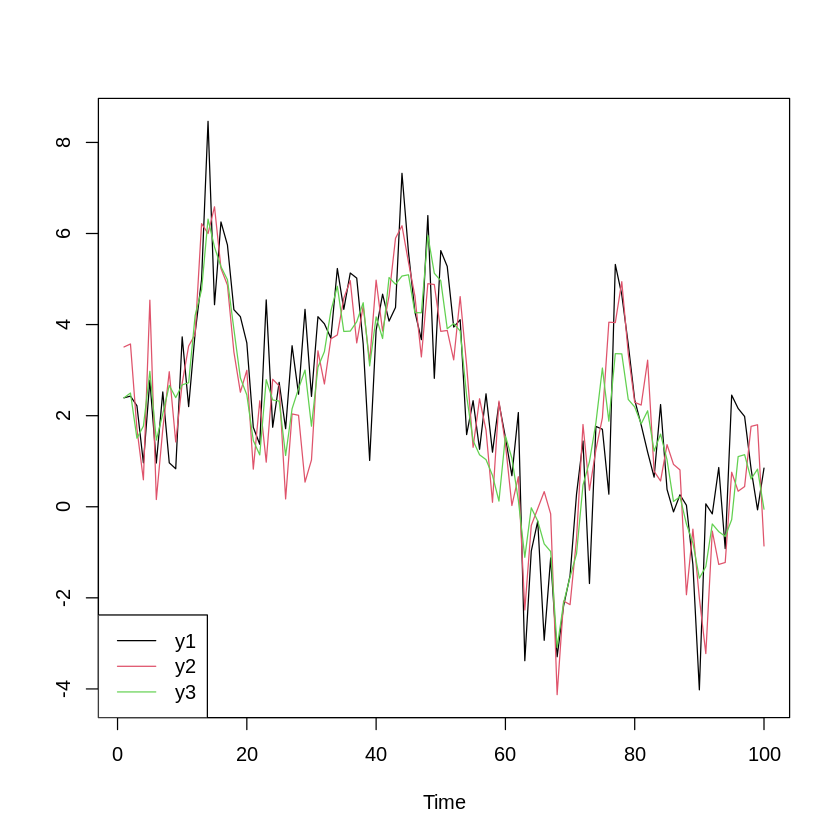

#############
###Model VECM 
#############
Full sample size: 100 	End sample size: 98
Number of variables: 3 	Number of estimated slope parameters 15
AIC 25.26536 	BIC 69.2098 	SSR 469.2405
Cointegrating vector (estimated by ML):
   y1        y2      y3
r1  1 -2.969418 2.00583


            ECT                 Intercept           y1 -1              
Equation y1 -0.1294(0.0863)     -0.0012(0.1689)     -0.4322(0.1174)*** 
Equation y2 0.3370(0.0645)***   -0.1157(0.1263)     -0.1519(0.0878).   
Equation y3 0.0172(0.0445)      -0.0310(0.0872)     -0.0170(0.0606)    
            y2 -1               y3 -1              
Equation y1 -0.1446(0.1831)     0.1656(0.2913)     
Equation y2 0.0146(0.1369)      -0.0024(0.2177)    
Equation y3 0.0549(0.0945)      -0.1307(0.1503)    

#############
###Model VECM 
#############
Full sample size: 100 	End sample size: 98
Number of variables: 3 	Number of estimated slope parameters 18
AIC -7.022549 	BIC 44.6768 	SSR 415.5772
Cointegrating vector (estimated by ML):
             y1 y2        y3
r1 1.000000e+00  0 -1.049085
r2 2.561148e-17  1 -1.028793


            ECT1               ECT2                Intercept          
Equation y1 -0.9574(0.1986)*** 0.0516(0.2442)      0.0264(0.1536)     
Equation y2 0.0260(0.1604)     -1.1258(0.1972)***  -0.1053(0.1241)    
Equation y3 0.0074(0.1134)     -0.0551(0.1394)     -0.0307(0.0877)    
            y1 -1               y2 -1              y3 -1              
Equation y1 -0.0179(0.1405)     0.0130(0.1700)     -0.3817(0.2909)    
Equation y2 0.0037(0.1134)      0.0738(0.1373)     -0.2080(0.2349)    
Equation y3 -0.0121(0.0802)     0.0568(0.0970)     -0.1372(0.1661)    

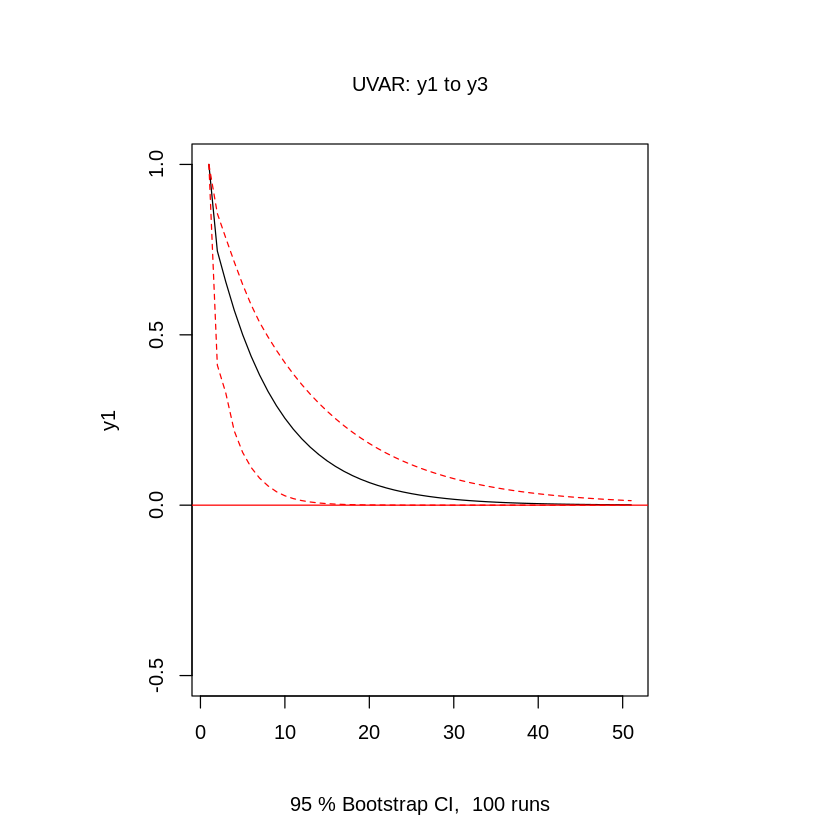

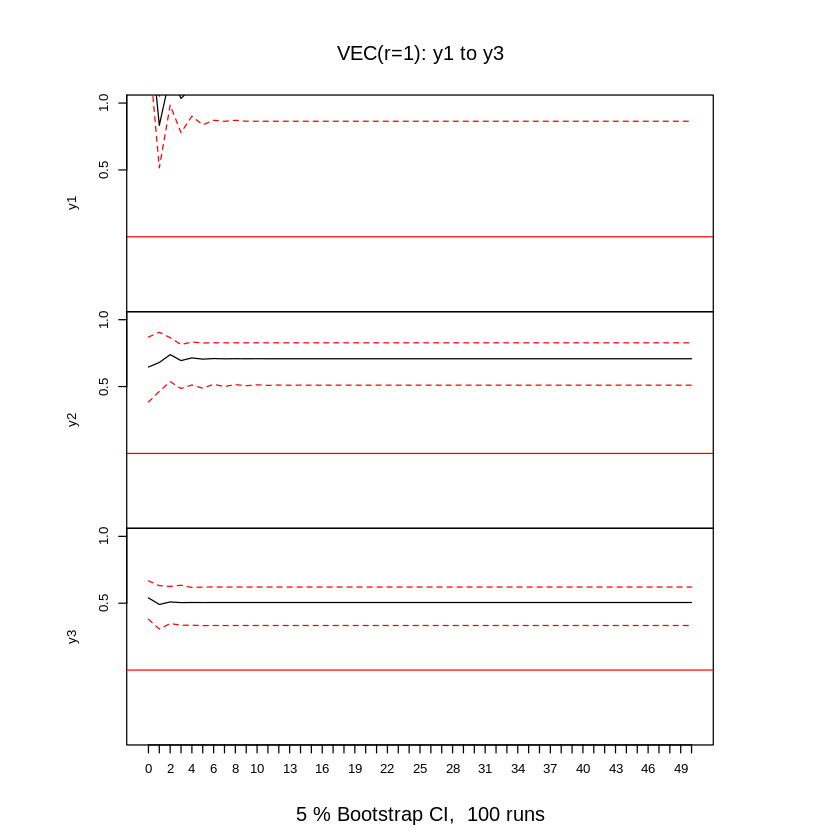

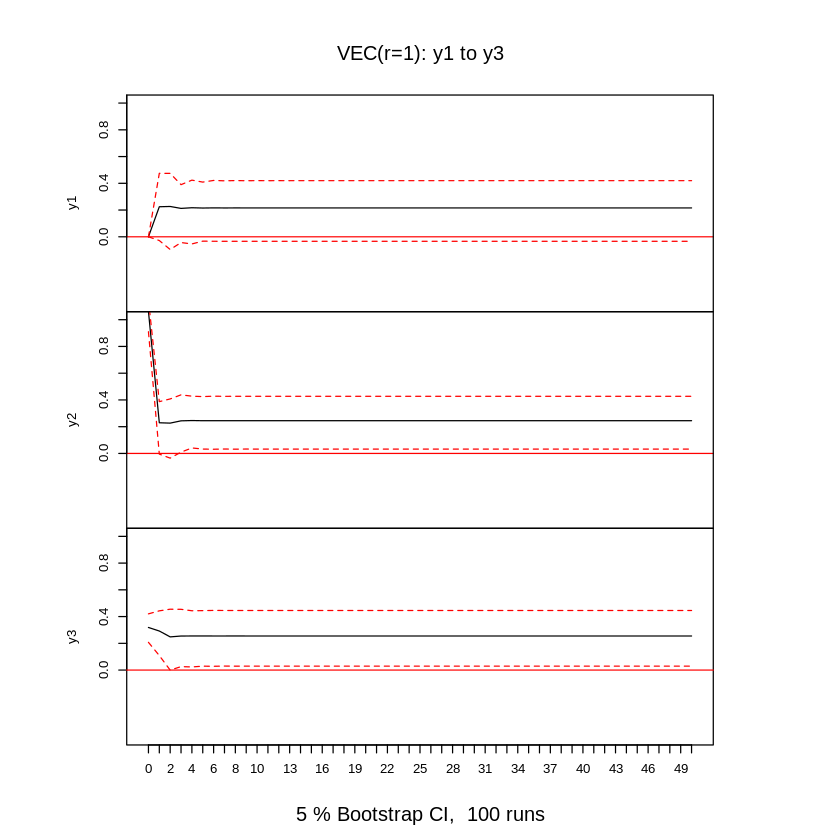

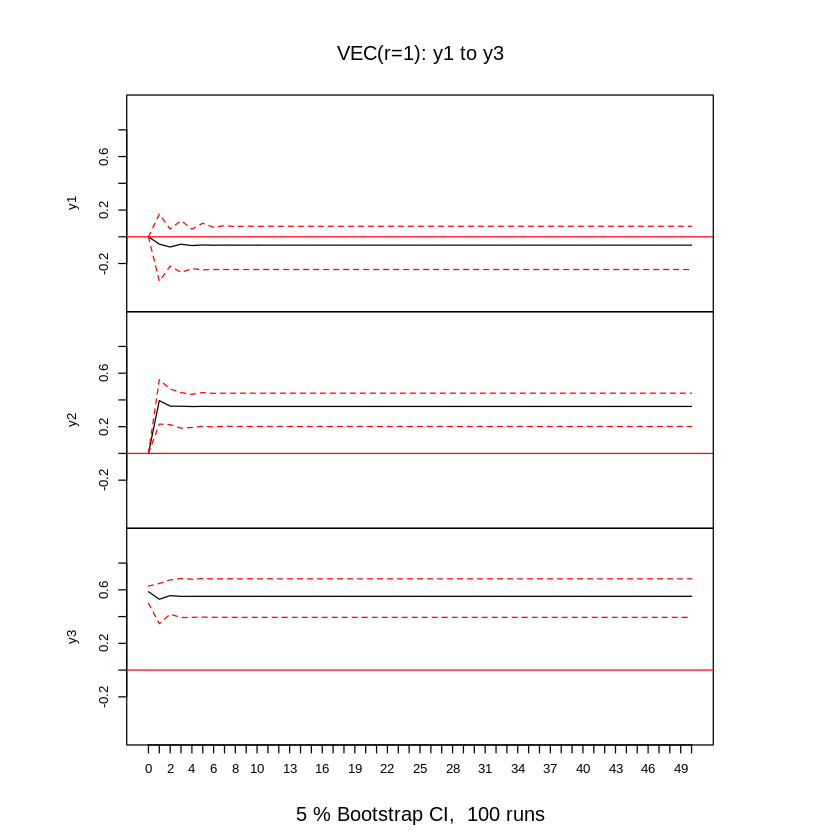

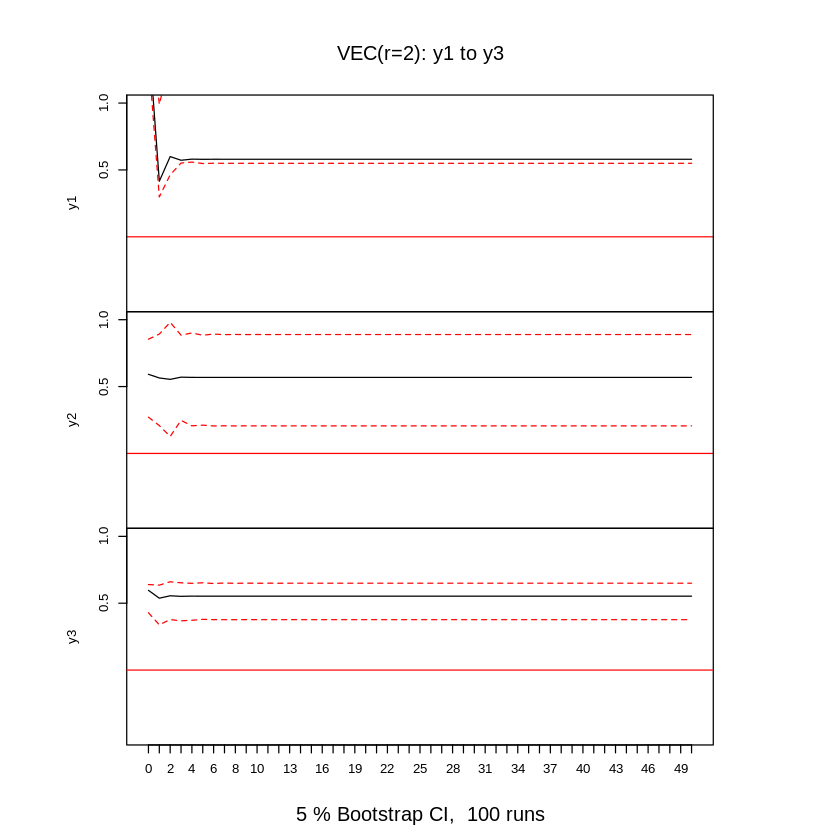

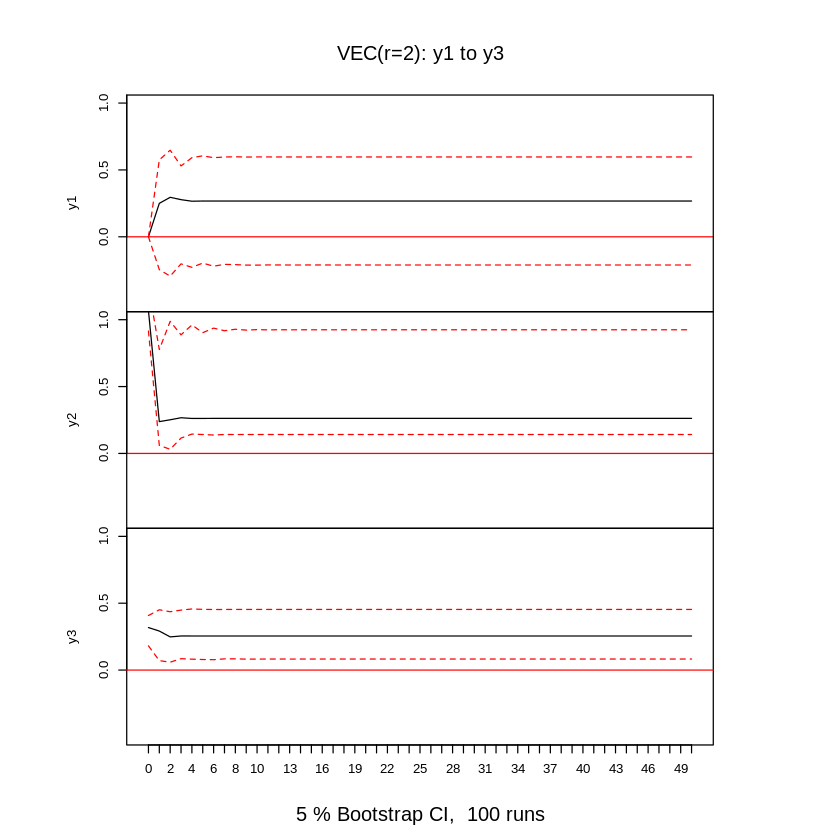

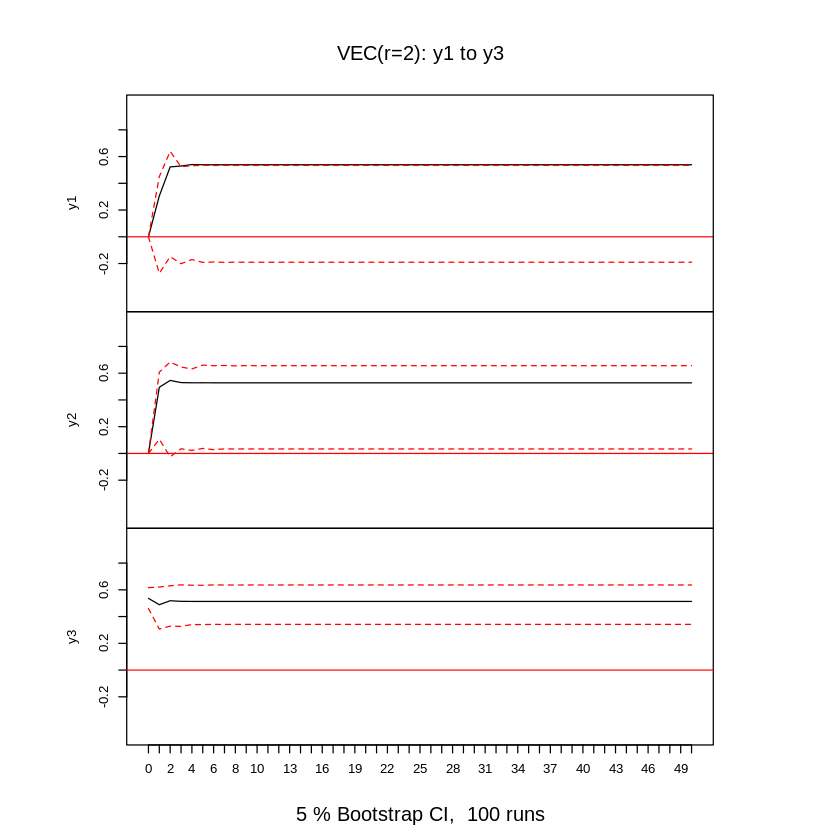

In [18]:

######################################################
# - 20 -
#Пример с тремя нестационарными рядами

rm(list=ls()) 

x <- read.csv("var_cointegrated_3series.csv", header = TRUE)
eps1 <- ts(x[,"eps1"], frequency=1)
eps2 <- ts(x[,"eps2"], frequency=1)
eps3 <- ts(x[,"eps3"], frequency=1)
y1 <- ts(x[,"y1"], frequency=1)
y2 <- ts(x[,"y2"], frequency=1)
y3 <- ts(x[,"y3"], frequency=1)

# - 20 a -
#dev.off()
#dev.new(width = 10, height = 6, unit = "cm", noRStudioGD = TRUE)
ts.plot(y1,y2,y3, type="l", col=c(1,2,3))
legend("bottomleft", border=NULL, legend=c("y1","y2","y3"), lty=c(1,1,1), col=c(1,2,3))

# - 20 b -
varmat <- as.matrix(cbind(y1,y2, y3))
#Ранг коинтеграции
jotest <-cajolst(varmat, K=3,  season=NULL)
summary(jotest)

VARselect(varmat, lag.max = 10, type = "none")
var1 <- VAR(varmat, p = 1, type = "both")

# - 20 c -
#упорядочение y1 -> y2 -> y3
# Создаем матрицу А
a.mat <- diag(3)
diag(a.mat) <- 1
a.mat[2, 1] <- NA
a.mat[3, 1] <- NA
a.mat[3, 2] <- NA
print(a.mat)

b2 <- diag(3)
b2[1, 1] <- 1
b2[1, 3] <- 1
b2[2, 2] <- 1
b2[2, 3] <- 1
b2[3, 3] <- 1
print(b2)

svar1 <- SVAR(var1, estmethod = "direct", Amat = a.mat, Bmat = b2, max.iter = 100)
summary(svar1)


# - 20 d -
#IRF

uvar31 <- irf(svar1, impulse = "y3", response = "y1", 
              n.ahead = 50, ortho = TRUE, boot = TRUE)
#dev.off()
#dev.new(width = 10, height = 6, unit = "cm", noRStudioGD = TRUE)
plot(uvar31, ylim=c(-0.5,1), main = "UVAR: y1 to y3")


#Johansen Procedure "ML" - без упорядочения
VECr1 <- VECM(varmat, r =1, lag=1, estim="ML", LRinclude = "none")
VECr2 <- VECM(varmat, r =2, lag=1, estim="ML", LRinclude = "none")
summary(VECr1)
summary(VECr2)

ECMr1 <- tsDyn::irf(VECr1, impulse = "y3", response = "y1" ,
                    n.ahead = 50, ortho = TRUE, boot = TRUE)

#dev.new(width = 10, height = 6, unit = "cm", noRStudioGD = TRUE)
plot(ECMr1, ylim =c(-0.5,1), main = "VEC(r=1): y1 to y3")

ECMr2 <- tsDyn::irf(VECr2, impulse = "y3", response = "y1" ,
                    n.ahead = 50, ortho = TRUE, boot = TRUE)
#dev.off()
#dev.new(width = 10, height = 6, unit = "cm", noRStudioGD = TRUE)
plot(ECMr2, ylim =c(-0.5,1), main = "VEC(r=2): y1 to y3")
